In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from citipy import citipy
from config import api 
import scipy.stats as st
#api.openweathermap.org/data/2.5/weather?id={city id}&appid={API key}
base_url = 'http://api.openweathermap.org/data/2.5/weather?id='

#query=f"{base_url}+{cities}+'&appid='+{api}"

city_output = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
at_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [84]:
cities_df=pd.DataFrame(cities)
cities_df=cities_df.rename(columns={0 : 'City Name'})

In [85]:



cities_df['Lat']=""
cities_df['Lng']=""
cities_df['Max Temp']=""
cities_df['Humidity']=""
cities_df['Cloudiness']=""
cities_df['Wind Speed']=""
cities_df['Country']=""
cities_df['Date']=""




In [8]:
url= 'http://api.openweathermap.org/data/2.5/weather'
params = {'appid' : api}
for x in cities:
    params = {'appid' : api,
                 'q' : x}
   

In [10]:
url= 'http://api.openweathermap.org/data/2.5/weather'
params = {'appid' : api}
print('Beginning Data Retrieval')
print('-------------------')
counts = 0 
sett = 1 


for index,rows in cities_df.iterrows():
    cityname = rows["City Name"]
    params['q'] = cityname
    print(f"Processing Record {counts} in set {sett} --- {cityname}")
    response = requests.get(url,params=params).json()
    try:
        
        cities_df.loc[index, 'Lat'] = response['coord']['lat']      
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Country'] = response['sys']['country']      
        cities_df.loc[index, 'Date'] = response['dt']
    
    except:
          print('city not found --- skip')
    

    counts += 1 
    if counts == 50:
        counts=0
        sett+=1
          
        time.sleep(20)
          
          
              

Beginning Data Retrieval
-------------------
Processing Record 0 in set 1 --- shrewsbury
Processing Record 1 in set 1 --- sangar
Processing Record 2 in set 1 --- vaini
Processing Record 3 in set 1 --- bredasdorp
Processing Record 4 in set 1 --- el faiyum
city not found --- skip
Processing Record 5 in set 1 --- chifeng
Processing Record 6 in set 1 --- guilin
Processing Record 7 in set 1 --- jamestown
Processing Record 8 in set 1 --- new norfolk
Processing Record 9 in set 1 --- babanusah
city not found --- skip
Processing Record 10 in set 1 --- champerico
Processing Record 11 in set 1 --- yialos
city not found --- skip
Processing Record 12 in set 1 --- blythe
Processing Record 13 in set 1 --- odweyne
Processing Record 14 in set 1 --- hermanus
Processing Record 15 in set 1 --- punta arenas
Processing Record 16 in set 1 --- izhma
Processing Record 17 in set 1 --- kodiak
Processing Record 18 in set 1 --- navahrudak
Processing Record 19 in set 1 --- illoqqortoormiut
city not found --- skip
P

Processing Record 30 in set 4 --- cotui
Processing Record 31 in set 4 --- dingle
Processing Record 32 in set 4 --- nanortalik
Processing Record 33 in set 4 --- gualeguay
Processing Record 34 in set 4 --- plouzane
Processing Record 35 in set 4 --- haimen
Processing Record 36 in set 4 --- camacha
Processing Record 37 in set 4 --- avera
Processing Record 38 in set 4 --- norman wells
Processing Record 39 in set 4 --- brae
Processing Record 40 in set 4 --- naron
Processing Record 41 in set 4 --- palana
Processing Record 42 in set 4 --- kaitangata
Processing Record 43 in set 4 --- ponta do sol
Processing Record 44 in set 4 --- nampula
Processing Record 45 in set 4 --- axim
Processing Record 46 in set 4 --- mahebourg
Processing Record 47 in set 4 --- cabo san lucas
Processing Record 48 in set 4 --- soyo
Processing Record 49 in set 4 --- tchibanga
Processing Record 0 in set 5 --- praia
Processing Record 1 in set 5 --- narsaq
Processing Record 2 in set 5 --- fuerte
Processing Record 3 in set 5 

Processing Record 16 in set 8 --- tahta
Processing Record 17 in set 8 --- port elizabeth
Processing Record 18 in set 8 --- prince rupert
Processing Record 19 in set 8 --- bolshaya murta
city not found --- skip
Processing Record 20 in set 8 --- contamana
Processing Record 21 in set 8 --- aybak
city not found --- skip
Processing Record 22 in set 8 --- kastamonu
Processing Record 23 in set 8 --- arica
Processing Record 24 in set 8 --- yar-sale
Processing Record 25 in set 8 --- katsuura
Processing Record 26 in set 8 --- sorland
Processing Record 27 in set 8 --- buraydah
Processing Record 28 in set 8 --- hohhot
Processing Record 29 in set 8 --- san policarpo
Processing Record 30 in set 8 --- adrar
Processing Record 31 in set 8 --- corinto
Processing Record 32 in set 8 --- bhakkar
Processing Record 33 in set 8 --- kuminskiy
Processing Record 34 in set 8 --- snellville
Processing Record 35 in set 8 --- tingrela
city not found --- skip
Processing Record 36 in set 8 --- upernavik
Processing Rec

Processing Record 46 in set 11 --- souillac
Processing Record 47 in set 11 --- cedral
Processing Record 48 in set 11 --- coxim
Processing Record 49 in set 11 --- dolinsk
Processing Record 0 in set 12 --- bastia
Processing Record 1 in set 12 --- matrei
city not found --- skip
Processing Record 2 in set 12 --- haines junction
Processing Record 3 in set 12 --- edmundston
Processing Record 4 in set 12 --- ushtobe
Processing Record 5 in set 12 --- praia da vitoria
Processing Record 6 in set 12 --- cabatuan
Processing Record 7 in set 12 --- kalomo
city not found --- skip
Processing Record 8 in set 12 --- lamu
Processing Record 9 in set 12 --- saint-denis
Processing Record 10 in set 12 --- marsabit
Processing Record 11 in set 12 --- vanavara
Processing Record 12 in set 12 --- jerez
Processing Record 13 in set 12 --- malanje
Processing Record 14 in set 12 --- batak
Processing Record 15 in set 12 --- hambantota
Processing Record 16 in set 12 --- zyryanka
Processing Record 17 in set 12 --- kabar

In [31]:
#dataframe created with object as datatypes for all columns 
cities_df.dtypes

City Name     object
Lat           object
Lng           object
Max Temp      object
Humidity      object
Cloudiness    object
Wind Speed    object
Country       object
Date          object
dtype: object

In [16]:
#export as csv
cities_df.to_csv(city_output)


In [51]:
#read as csv to change datatypes 
cities = pd.read_csv('output_data/cities.csv')

#check dtypes
cities.dtypes


Unnamed: 0      int64
City Name      object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

In [3]:
#no cities with over 100 humidity
cities_over100=cities.loc[(cities['Humidity']>100)]
cities_over100.count()

Unnamed: 0    0
City Name     0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [4]:

cities=cities.drop(columns = 'Unnamed: 0')



In [5]:
cities

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shrewsbury,52.7101,-2.7521,280.15,87.0,75.0,3.60,GB,1.619569e+09
1,sangar,63.9242,127.4739,265.12,83.0,47.0,3.82,RU,1.619569e+09
2,vaini,-21.2000,-175.2000,297.15,83.0,75.0,7.72,TO,1.619569e+09
3,bredasdorp,-34.5322,20.0403,283.15,93.0,99.0,0.51,ZA,1.619569e+09
4,el faiyum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
622,chimbote,-9.0853,-78.5783,291.86,90.0,76.0,3.11,PE,1.619569e+09
623,dahegam,23.1667,72.8167,303.15,30.0,40.0,1.54,IN,1.619569e+09
624,issenye,-2.0000,34.3333,289.22,95.0,34.0,1.48,TZ,1.619569e+09
625,igarka,67.4667,86.5833,273.55,86.0,100.0,6.40,RU,1.619569e+09


In [6]:
#set cities as index 
cities=cities.set_index('City Name')

In [7]:
#dropped cities with no data available from api 
cities_clean = cities.dropna(axis=0,how='all')

In [11]:
cities_clean
#save cleaned dataframe as csv
city_clean = "output_data/cities_clean.csv"
cities_clean.to_csv(city_clean)

In [12]:
cities_clean

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City Name,,,,,,,,
shrewsbury,52.7101,-2.7521,280.15,87.0,75.0,3.60,GB,1.619569e+09
sangar,63.9242,127.4739,265.12,83.0,47.0,3.82,RU,1.619569e+09
vaini,-21.2000,-175.2000,297.15,83.0,75.0,7.72,TO,1.619569e+09
bredasdorp,-34.5322,20.0403,283.15,93.0,99.0,0.51,ZA,1.619569e+09
chifeng,42.2683,118.9636,283.33,20.0,0.0,9.71,CN,1.619569e+09
...,...,...,...,...,...,...,...,...
chimbote,-9.0853,-78.5783,291.86,90.0,76.0,3.11,PE,1.619569e+09
dahegam,23.1667,72.8167,303.15,30.0,40.0,1.54,IN,1.619569e+09
issenye,-2.0000,34.3333,289.22,95.0,34.0,1.48,TZ,1.619569e+09


In [42]:
#returned to finish and loaded saved csv
citiesclean = pd.read_csv('output_data/cities_clean.csv')

In [43]:
citiesclean

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shrewsbury,52.7101,-2.7521,280.15,87.0,75.0,3.60,GB,1.619569e+09
1,sangar,63.9242,127.4739,265.12,83.0,47.0,3.82,RU,1.619569e+09
2,vaini,-21.2000,-175.2000,297.15,83.0,75.0,7.72,TO,1.619569e+09
3,bredasdorp,-34.5322,20.0403,283.15,93.0,99.0,0.51,ZA,1.619569e+09
4,chifeng,42.2683,118.9636,283.33,20.0,0.0,9.71,CN,1.619569e+09
...,...,...,...,...,...,...,...,...,...
574,chimbote,-9.0853,-78.5783,291.86,90.0,76.0,3.11,PE,1.619569e+09
575,dahegam,23.1667,72.8167,303.15,30.0,40.0,1.54,IN,1.619569e+09
576,issenye,-2.0000,34.3333,289.22,95.0,34.0,1.48,TZ,1.619569e+09
577,igarka,67.4667,86.5833,273.55,86.0,100.0,6.40,RU,1.619569e+09


In [44]:
#created variables
latitude = citiesclean['Lat']
temp = citiesclean['Max Temp']
humidity = citiesclean['Humidity']
cloudiness = citiesclean['Cloudiness']
wind = citiesclean['Wind Speed']

In [56]:
#somewhere the latitude column was dropped but the series was still callable
#added new column calle Latitude to show that data 
citiesclean['Latitude'] = citiesclean['Lat']

citiesclean.head()

,City Name,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Latitude
0,shrewsbury,52.7101,-2.7521,280.15,87.0,75.0,3.60,GB,1.619569e+09,52.7101
1,sangar,63.9242,127.4739,265.12,83.0,47.0,3.82,RU,1.619569e+09,63.9242
2,vaini,-21.2000,-175.2000,297.15,83.0,75.0,7.72,TO,1.619569e+09,-21.2000
3,bredasdorp,-34.5322,20.0403,283.15,93.0,99.0,0.51,ZA,1.619569e+09,-34.5322
4,chifeng,42.2683,118.9636,283.33,20.0,0.0,9.71,CN,1.619569e+09,42.2683


Text(0.5, 1.0, 'temperature by latitude')

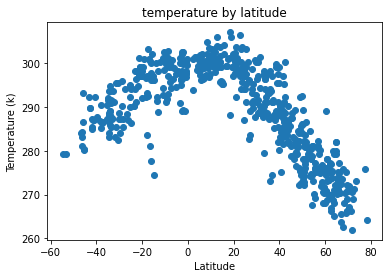

In [46]:
plt.scatter(latitude, temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature (k)')
plt.title('temperature by latitude')

This plot is showing the relationship between temperature and latitude. As you can see the equator has the highest temps, while the northern temperatures have a larger range. 

Text(0.5, 1.0, 'humidity by latitude')

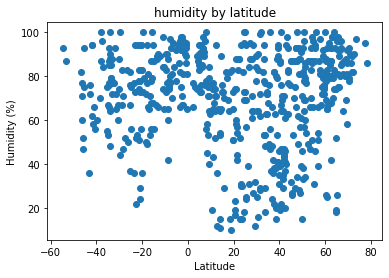

In [47]:
plt.scatter(latitude, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('humidity by latitude')

This plot shows humidity by latitude. From our sample we can see that the Northern latitudes have a greater range. Also around the equator humidity is not recorded below 60%.

Text(0.5, 1.0, 'cloud cover by latitude')

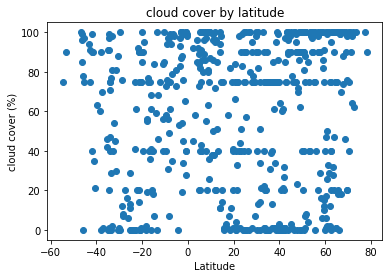

In [48]:
plt.scatter(latitude, cloudiness)
plt.xlabel('Latitude')
plt.ylabel('cloud cover (%)')
plt.title('cloud cover by latitude')

This plot shows cloud cover by latitude. Generally it appears both southern and northern latitudes have fairly similar distribution. The equator however doesnt show cloud cover below around 20%. 

Text(0.5, 1.0, 'wind speed by latitude')

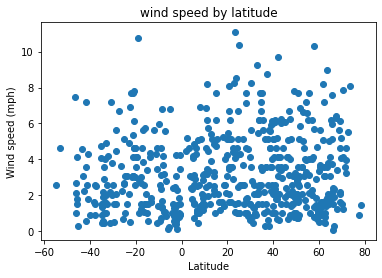

In [49]:
plt.scatter(latitude, wind)
plt.xlabel('Latitude')
plt.ylabel('Wind speed (mph)')
plt.title('wind speed by latitude')

This plot shows wind speed by latitude. Typically most data points in both hemispheres stay below 5 miles per hour. Some outliers do occur in both hemispheres.

In [67]:
n = citiesclean.loc[(citiesclean['Latitude']>=0)]
north = n['Latitude']
northtemp= n['Max Temp']
northwind = n['Wind Speed']
northcloud = n['Cloudiness']
northhumid = n['Humidity']

In [70]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north,northtemp)


Text(0.5, 1.0, 'max temp (k) by latitude N.Hemisphere')

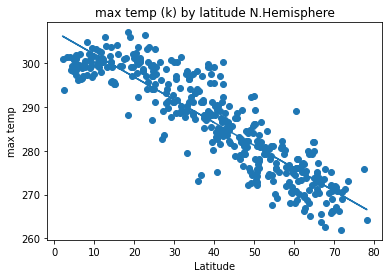

In [71]:
plt.scatter(north, northtemp)
reg = north*slope+intercept
plt.plot(north,reg)
plt.xlabel('Latitude')
plt.ylabel('max temp')
plt.title('max temp (k) by latitude N.Hemisphere')

in the northern hemisphere as latitude increases max temp decreases. 

In [72]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north,northhumid)

Text(0.5, 1.0, 'humidity by latitude in N.Hemisphere')

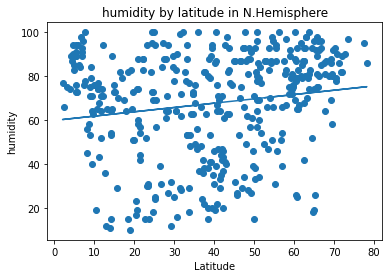

In [73]:
plt.scatter(north, northhumid)
reg2 = north*slope+intercept
plt.plot(north,reg2)
plt.xlabel('Latitude')
plt.ylabel('humidity')
plt.title('humidity by latitude in N.Hemisphere')

Humidity shows a slight increase as latitude increases

Text(0.5, 1.0, 'windspeed by latitude in N.Hemisphere')

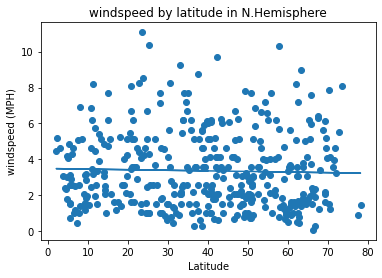

In [74]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north,northwind)
plt.scatter(north, northwind)
reg = north*slope+intercept
plt.plot(north,reg)
plt.xlabel('Latitude')
plt.ylabel('windspeed (MPH)')
plt.title('windspeed by latitude in N.Hemisphere')

Wind speed shows not much change over latitude in the N.hemisphere. 

Text(0.5, 1.0, 'cloud cover % by latitude in N.Hemisphere')

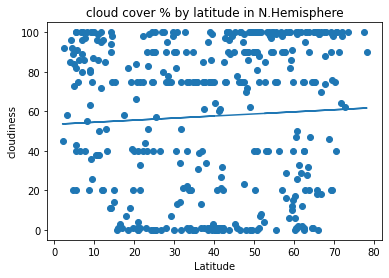

In [75]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north,northcloud)
plt.scatter(north, northcloud)
reg = north*slope+intercept
plt.plot(north,reg)
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title('cloud cover % by latitude in N.Hemisphere')

cloud cover fairly equal distribution over latitude, however a slight increase with latitude. 

In [76]:
s = citiesclean.loc[(citiesclean['Latitude']<=0)]
south = s['Latitude']
southtemp= s['Max Temp']
southwind = s['Wind Speed']
southcloud = s['Cloudiness']
southhumid = s['Humidity']

Text(0.5, 1.0, 'cloud cover % by latitude in S.Hemisphere')

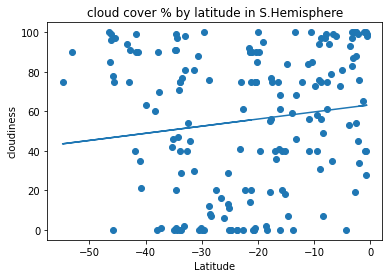

In [77]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south,southcloud)
plt.scatter(south, southcloud)
reg = south*slope+intercept
plt.plot(south,reg)
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title('cloud cover % by latitude in S.Hemisphere')

Increase in cloud cover as latitude increases drawing closer to the equator. 

Text(0.5, 1.0, 'max temp by latitude in S.Hemisphere')

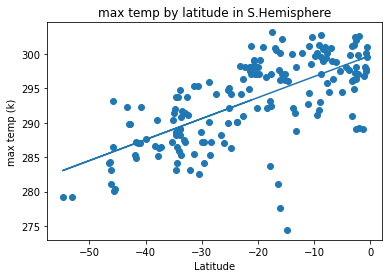

In [79]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south,southtemp)
plt.scatter(south, southtemp)
reg = south*slope+intercept
plt.plot(south,reg)
plt.xlabel('Latitude')
plt.ylabel('max temp (k)')
plt.title('max temp by latitude in S.Hemisphere')

Max temp clearly affected by latitude, temperature increase as latitude approaches equator. 

Text(0.5, 1.0, 'humidity by latitude in S.Hemisphere')

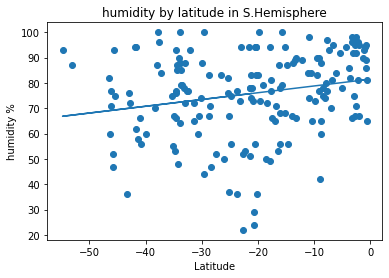

In [80]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south,southhumid)
plt.scatter(south, southhumid)
reg = south*slope+intercept
plt.plot(south,reg)
plt.xlabel('Latitude')
plt.ylabel('humidity %')
plt.title('humidity by latitude in S.Hemisphere')

Humidity shows increase as latitude approaches equator 

Text(0.5, 1.0, 'windspeed by latitude in S.Hemisphere')

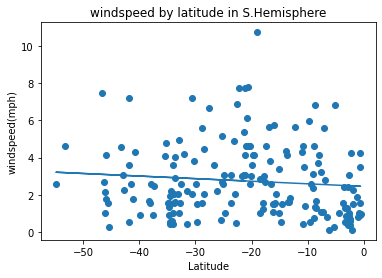

In [81]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south,southwind)
plt.scatter(south, southwind)
reg = south*slope+intercept
plt.plot(south,reg)
plt.xlabel('Latitude')
plt.ylabel('windspeed(mph)')
plt.title('windspeed by latitude in S.Hemisphere')

windspeed shows slight decrease towards equator. 